In [262]:
import pandas as pd

In [264]:
df = pd.read_csv("D:/ETL HIVE/PYTHON/ADV PY/Cars93.csv")

In [266]:
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


<Axes: >

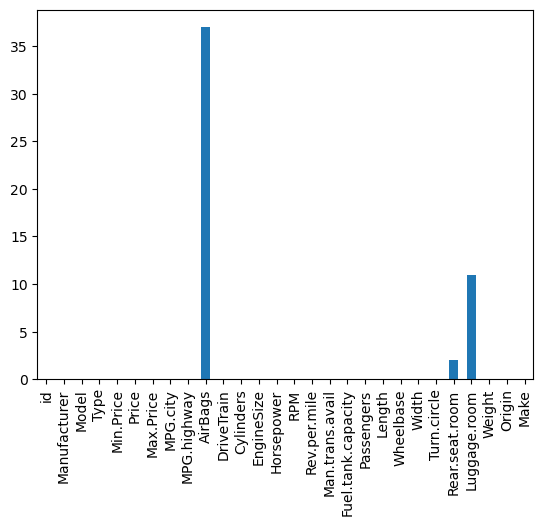

In [268]:
df.isna().sum().plot(kind='bar')

In [270]:
for i in df.columns:
    if df[i].dtypes== object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())
    

<Axes: >

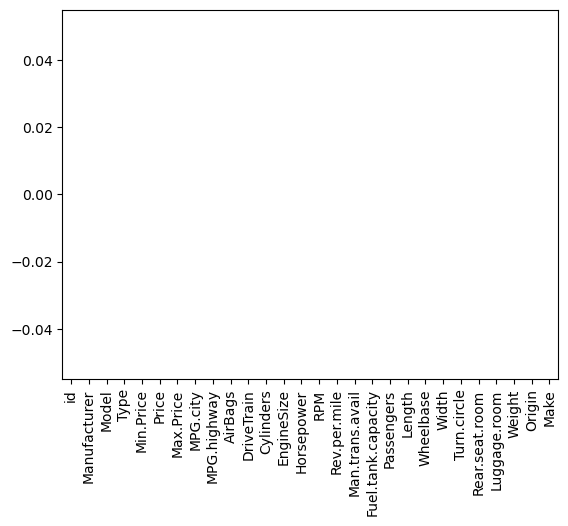

In [272]:
df.isna().sum().plot(kind='bar')

In [274]:
X = df.drop('Weight',axis=1)

In [276]:
Y = df[['Weight']]

In [278]:
cat = []
con = []

for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [280]:
Xcat = X [cat]
Xcon = X [con]

In [282]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [284]:
le = LabelEncoder()
ss = StandardScaler()

In [286]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18884\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18884\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18884\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [288]:
Xcon = pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [290]:
X = Xcon.join(Xcat)

In [292]:
out = []
for i in Xcon.columns:
    o = Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
    out.extend(o)

In [294]:
a = list(set(out))
a

[38, 41, 47, 16, 58, 59]

In [296]:
X = X.drop(index=a,axis=0)
Y = Y.drop(index=a,axis=0)

In [298]:
X.index=range(X.shape[0])
Y.index=range(Y.shape[0])

In [301]:
X.shape

(87, 27)

In [303]:
Y.shape

(87, 1)

In [305]:
from sklearn.model_selection import train_test_split

In [307]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [309]:
xtrain.shape


(69, 27)

In [311]:
ytrain.shape

(69, 1)

In [313]:
from sklearn.linear_model import LinearRegression


In [315]:
lr = LinearRegression()

In [317]:
model = lr.fit(xtrain,ytrain)

In [319]:
tr_pred = model.predict(xtrain)


In [321]:
ts_pred = model.predict(xtest)

In [323]:
from sklearn.metrics import r2_score

In [325]:
tr_score = r2_score(ytrain,tr_pred)
tr_score

0.9691344708192086

In [327]:
ts_score = r2_score(ytest,ts_pred)
ts_score

0.8596502283959535

In [329]:
from sklearn.linear_model import Ridge

In [331]:
a = []
e = 0.01

for i in range(0,1000,1):
    a.append(e)
    e = round(e + 0.01,2)

In [333]:
# assigining empty list
tr = []
ts = []

for i in a:
    rr = Ridge(alpha=i)

    # build model on alpha values from list w
    model=rr.fit(xtrain,ytrain)

     #traning and testing predications
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)

    #traning and testing scores
    tr_score = r2_score(ytrain,tr_pred)
    ts_score = r2_score(ytest,ts_pred)

    # storing traning and testing scores in tr and ts list
    tr.append(round(tr_score,4))
    ts.append(round(ts_score,4))
print(tr)
print(ts)

[0.9689, 0.9689, 0.9688, 0.9688, 0.9688, 0.9688, 0.9688, 0.9688, 0.9688, 0.9688, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9687, 0.9686, 0.9686, 0.9686, 0.9686, 0.9686, 0.9686, 0.9686, 0.9686, 0.9685, 0.9685, 0.9685, 0.9685, 0.9685, 0.9685, 0.9685, 0.9685, 0.9684, 0.9684, 0.9684, 0.9684, 0.9684, 0.9684, 0.9684, 0.9684, 0.9683, 0.9683, 0.9683, 0.9683, 0.9683, 0.9683, 0.9683, 0.9683, 0.9682, 0.9682, 0.9682, 0.9682, 0.9682, 0.9682, 0.9682, 0.9682, 0.9681, 0.9681, 0.9681, 0.9681, 0.9681, 0.9681, 0.9681, 0.9681, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.9679, 0.9679, 0.9679, 0.9679, 0.9679, 0.9679, 0.9679, 0.9679, 0.9678, 0.9678, 0.9678, 0.9678, 0.9678, 0.9678, 0.9678, 0.9678, 0.9677, 0.9677, 0.9677, 0.9677, 0.9677, 0.9677, 0.9677, 0.9677, 0.9676, 0.9676, 0.9676, 0.9676, 0.9676, 0.9676, 0.9676, 0.9676, 0.9675, 0.9675, 0.9675, 0.9675, 0.9675, 0.9675, 0.9675, 0.9675, 0.9674, 0.9674, 0.9674, 0.9674, 0.9674, 0.9674, 0.9674, 0.9674, 0.9673, 0.9673, 0.9673, 0.9673, 0.9673,

In [334]:
import matplotlib.pyplot as plt

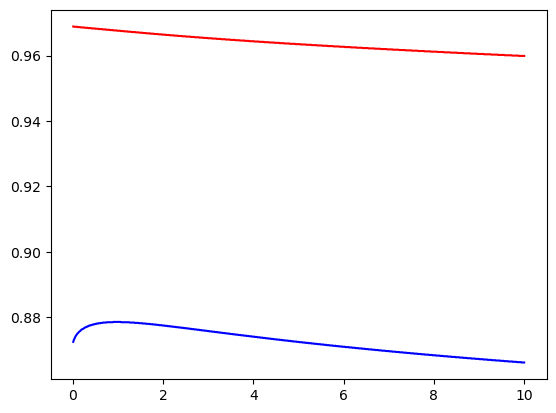

In [335]:
plt.plot(a,tr,c='red')
plt.plot(a,ts,c='blue')

In [336]:
from sklearn.linear_model import Lasso

In [337]:
from sklearn.metrics import mean_squared_error

In [340]:

    ll = Lasso()

    model=ll.fit(xtrain,ytrain)


    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)

    tr_err = mean_squared_error(ytrain,tr_pred)
    ts_err = mean_squared_error(ytest,ts_pred)

    tr_score = r2_score(ytrain,tr_pred)
    ts_score = r2_score(ytest,ts_pred)


    tr_score=r2_score(ytrain,tr_pred)
    ts_score=r2_score(ytest,ts_pred)

print(tr_score)
print(tr_score)

0.9678750383288951
0.9678750383288951


# Grid search cross validation

In [346]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

In [348]:
w=[]
e=0.01
for i in range(0,100,1):
  w.append(e)
  e=round(e+0.01,4)

In [350]:
import numpy as np

rr=Ridge()
hp={'alpha':w,'random_state':np.arange(1,40)}

from sklearn.model_selection import GridSearchCV

cv=GridSearchCV(rr,hp,scoring='neg_mean_squared_error',cv=4)
cvmodel=cv.fit(X,Y)

In [352]:
cvmodel.best_params_

{'alpha': 1.0, 'random_state': 1}

In [354]:
rr=Ridge(alpha=1.0,random_state=1)
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

tr_err=mean_squared_error(ytrain,tr_pred)
ts_err=mean_squared_error(ytest,ts_pred)


print(tr_err)
print(ts_err)

10541.914015931232
32147.954585481217


# doing same using lasso

In [357]:
import numpy as np

ll=Lasso()
hp={'alpha':w,'random_state':np.arange(1,40)}

from sklearn.model_selection import GridSearchCV

cv=GridSearchCV(rr,hp,scoring='neg_mean_squared_error',cv=4)
cvmodel=cv.fit(X,Y)

In [358]:
cvmodel.best_params_

{'alpha': 1.0, 'random_state': 1}

In [361]:
ll=Ridge(alpha=1.0,random_state=1)
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

tr_err=mean_squared_error(ytrain,tr_pred)
ts_err=mean_squared_error(ytest,ts_pred)


print(tr_err)
print(ts_err)

10541.914015931232
32147.954585481217


In [363]:
from sklearn.model_selection import RandomizedSearchCV

cv=RandomizedSearchCV(ll,hp,scoring='neg_mean_squared_error',cv=4)
cvmodel=cv.fit(X,Y)

In [365]:
cvmodel.best_estimator_

Ridge(alpha=0.96, random_state=33)